In [2]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, f1_score, auc, recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('parkinsons.csv')

In [4]:
df.info()
df
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

In [6]:
df = df.drop(columns=['DoctorInCharge'])
df = df.drop(columns=['PatientID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2105 non-null   int64  
 1   Gender                    2105 non-null   int64  
 2   Ethnicity                 2105 non-null   int64  
 3   EducationLevel            2105 non-null   int64  
 4   BMI                       2105 non-null   float64
 5   Smoking                   2105 non-null   int64  
 6   AlcoholConsumption        2105 non-null   float64
 7   PhysicalActivity          2105 non-null   float64
 8   DietQuality               2105 non-null   float64
 9   SleepQuality              2105 non-null   float64
 10  FamilyHistoryParkinsons   2105 non-null   int64  
 11  TraumaticBrainInjury      2105 non-null   int64  
 12  Hypertension              2105 non-null   int64  
 13  Diabetes                  2105 non-null   int64  
 14  Depressi

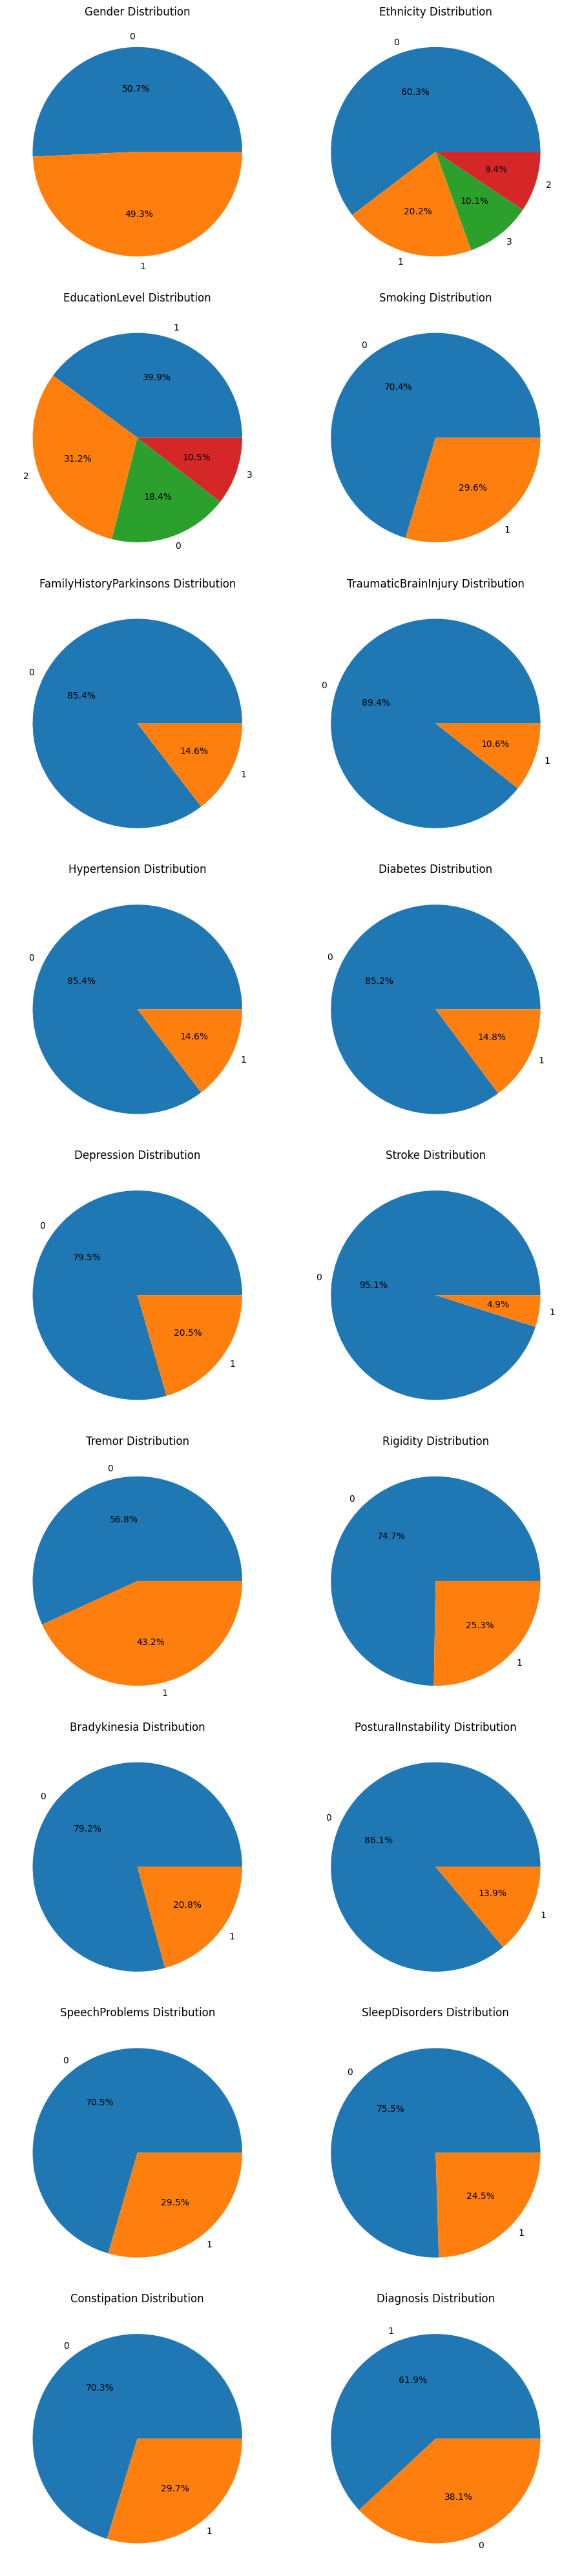

In [7]:
columns_d = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryParkinsons',
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
    'SleepDisorders', 'Constipation', 'Diagnosis'
]

# Creazione della figura e degli assi con 2 colonne
fig, axs = plt.subplots(nrows=len(columns_d) // 2 + len(columns_d) % 2, ncols=2, figsize=(10, 40))

# Flatten degli assi per facilitarne l'iterazione
axs = axs.flatten()

for i, col in enumerate(columns_d):
    counts = df[col].value_counts()
    axs[i].pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%')
    axs[i].set_title(f'{col} Distribution')
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

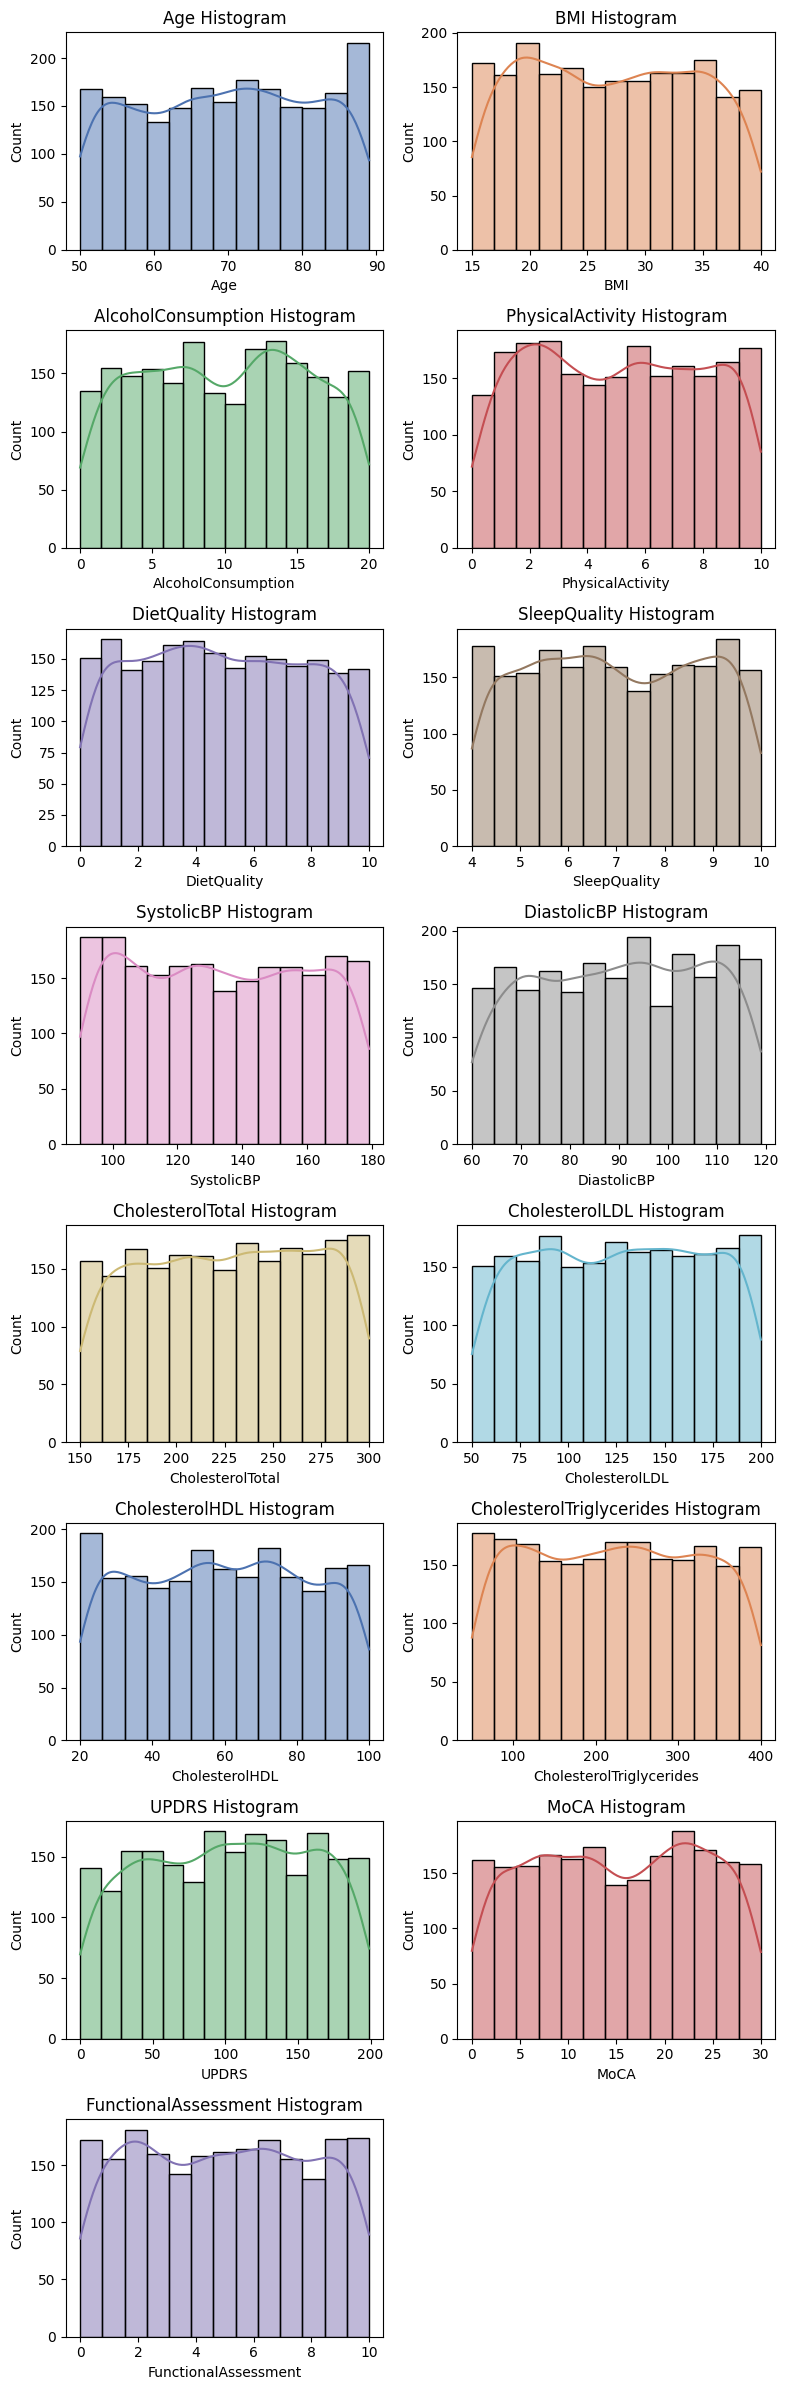

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista delle colonne numeriche continue
columns_s = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
             'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
             'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment']

# Numero di colonne per riga
n_cols = 2
n_rows = (len(columns_s) + n_cols - 1) // n_cols  # Calcolo il numero di righe necessarie

# Creazione di una griglia di sottotrame
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 3 * n_rows))

# Appiattire l'array di assi per iterare facilmente
axs = axs.flatten()
colors = sns.color_palette("deep", len(columns_s))

# Ciclo per generare un istogramma per ogni colonna con colori differenti
for i, (col, color) in enumerate(zip(columns_s, colors)):
    sns.histplot(df[col], kde=True, ax=axs[i], color=color)  # Grafico dell'istogramma con KDE
    axs[i].set_title(f'{col} Histogram')  # Titolo con il nome della colonna
    axs[i].set_xlabel(col)  # Etichetta asse X con il nome della colonna
    axs[i].set_ylabel('Count')  # Etichetta asse Y come Conteggio

# Rimuove eventuali sottotrame vuote nel caso in cui il numero di grafici sia dispari
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()  # Aggiusta gli spazi tra i grafici
plt.show()

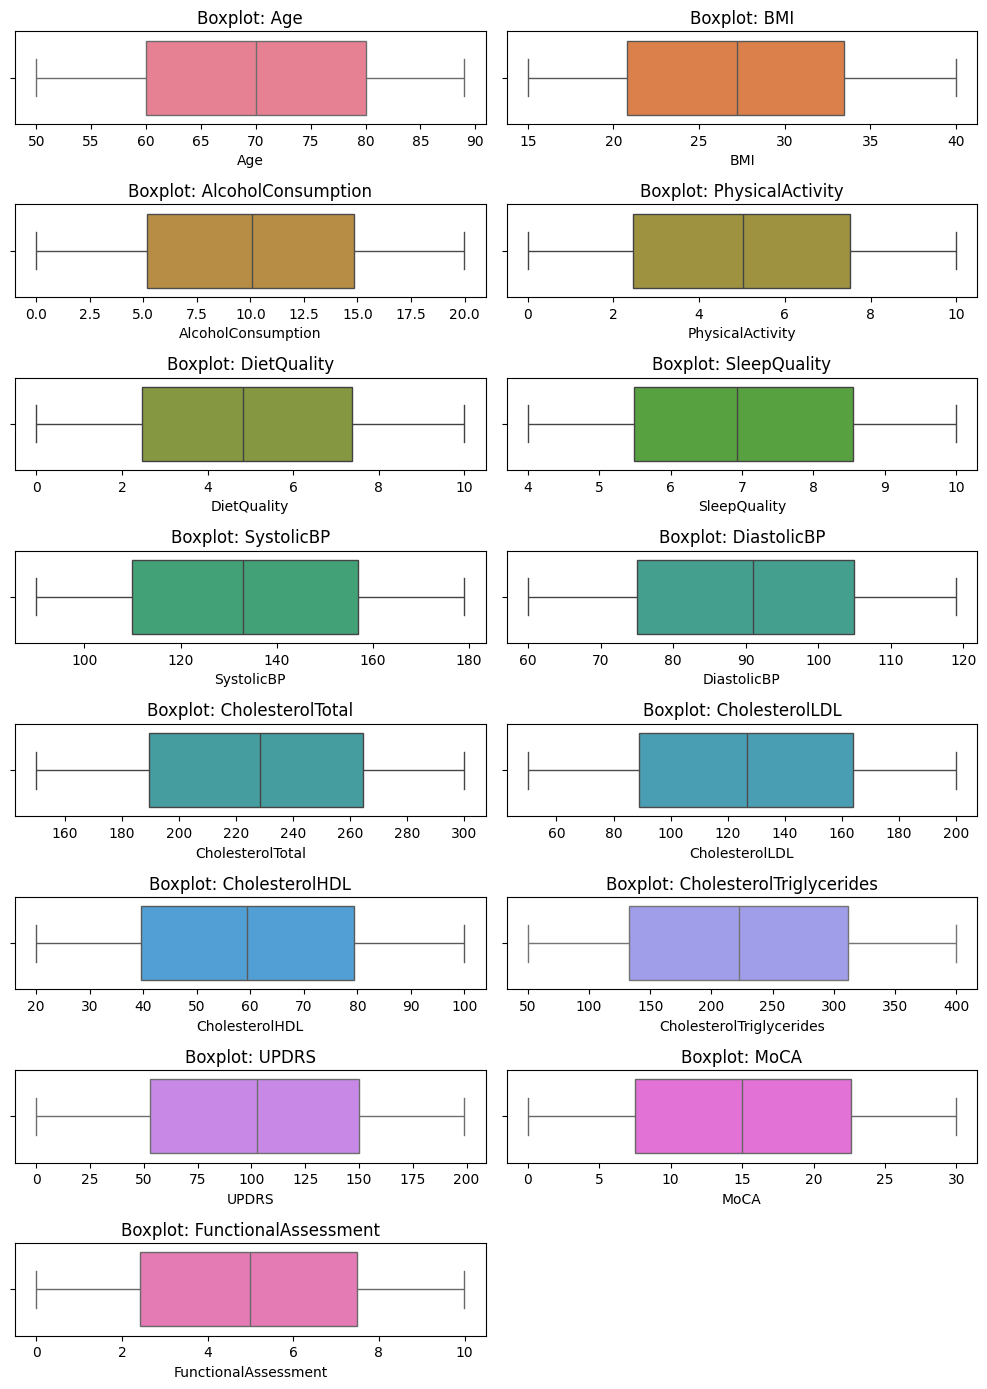

In [9]:
fig, axes = plt.subplots(nrows=(len(columns_s) + 1) // 2, ncols=2, figsize=(10, 14))  # Griglia 2 colonne per riga

# Crea una palette di colori
palette = sns.color_palette("husl", len(columns_s))  # Utilizza la palette 'husl' con tanti colori quante sono le colonne

# Itera sulle colonne e sugli assi della griglia
for i, column in enumerate(columns_s):
    row = i // 2  # Calcola la riga
    col = i % 2   # Calcola la colonna
    sns.boxplot(x=df[column], ax=axes[row, col], color=palette[i])  # Boxplot per la colonna specifica, usa colore differente
    axes[row, col].set_title(f'Boxplot: {column}')  # Titolo del grafico

# Rimuove eventuali assi vuoti
for j in range(i+1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Regola gli spazi tra i grafici
plt.tight_layout()
plt.show()

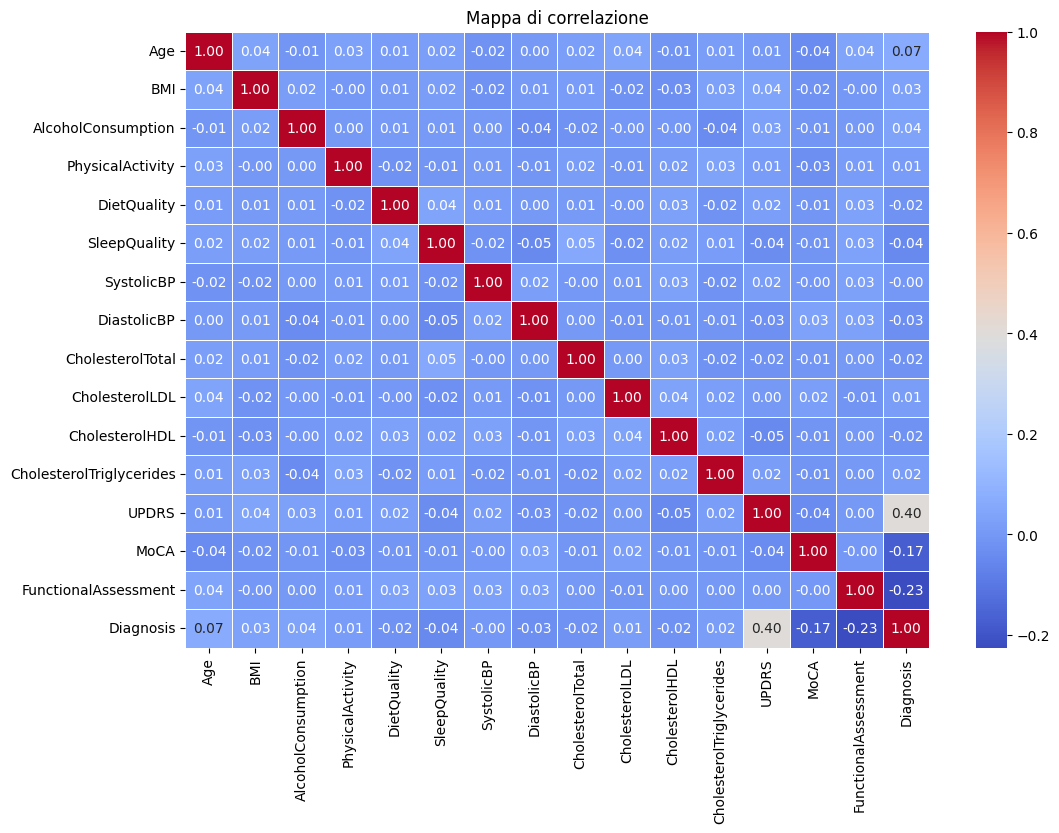

In [10]:

correl_map=['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
           'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
           'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Diagnosis']
correlation_matrix = df[correl_map].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mappa di correlazione')
plt.show()

In [11]:
scaler = StandardScaler()

features = df.iloc[:, :-1]  
target = df.iloc[:, -1]   


scaled_features = scaler.fit_transform(features)


scaled_dataset = pd.DataFrame(scaled_features, columns=features.columns)
scaled_dataset['Diagnosis'] = target


scaled_dataset.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,1.328366,-0.985380,2.299112,-0.376599,-1.053179,-0.649105,-0.867475,-1.258035,-0.354851,1.304629,...,1.630256,-1.165038,1.147053,-0.581556,-0.511850,-0.401322,-0.646888,-0.569853,-0.649844,0
1,0.465684,-0.985380,-0.690160,0.739937,-1.521172,1.540583,-0.705769,1.173999,1.253913,-0.795464,...,-0.319603,-0.068916,-0.871799,1.719525,-0.511850,2.491767,-0.646888,1.754838,-0.649844,1
2,0.034343,1.014837,-0.690160,-1.493134,-1.643161,-0.649105,-1.371569,-1.661943,0.552304,1.673573,...,1.716646,-0.974713,1.147053,-0.581556,-0.511850,-0.401322,1.545864,-0.569853,1.538831,1
3,-1.518484,-0.985380,-0.690160,-1.493134,-1.631183,-0.649105,-0.711021,-1.259978,0.627607,-1.597839,...,0.718665,-0.544940,1.147053,1.719525,1.953697,-0.401322,-0.646888,-0.569853,1.538831,1
4,1.500903,-0.985380,-0.690160,-0.376599,-1.192477,-0.649105,-0.046638,-1.324484,-0.088920,1.350691,...,-0.782083,-0.609825,-0.871799,-0.581556,-0.511850,2.491767,-0.646888,1.754838,-0.649844,0


In [12]:
target_column = 'Diagnosis'

In [13]:
x, y = scaled_dataset.iloc[:,:-1], scaled_dataset.iloc[:,-1]

In [14]:
x_trainval, x_test, y_trainval, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size=0.25, random_state=42)

In [15]:
# Support Vector Machine
from sklearn.svm import SVC
svm_clf = SVC(probability=True, random_state=42)

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(x_train, y_train)
best_svm_clf = svm_grid_search.best_estimator_
svm_pred = best_svm_clf.predict(x_test)

In [16]:
precision = accuracy_score(y_test, svm_pred)
print("Precision:", precision)

print(classification_report(y_test, svm_pred))

Precision: 0.7790973871733967
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       150
           1       0.80      0.87      0.83       271

    accuracy                           0.78       421
   macro avg       0.76      0.74      0.75       421
weighted avg       0.77      0.78      0.77       421



In [17]:
print(x.shape)
print(y.shape)

(2105, 32)
(2105,)


In [18]:
data_dmatrix = xgb.DMatrix(data=x, label=y)

In [22]:

#XGBoost
xg_clf = XGBClassifier(objective='binary:logistic',tree_method='hist', random_state=42)


param_grid = {
    'colsample_bytree': [0.2, 0.3, 0.4],
    'n_estimators': [50, 75, 100, 150, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'alpha': [5, 10, 20],
}
grid_search = GridSearchCV(xg_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)  


best_xg_clf = grid_search.best_estimator_


y_pred = best_xg_clf.predict(x_test)

In [23]:
precision = accuracy_score(y_test, y_pred)
print("Precision:", precision)

print(classification_report(y_test, y_pred))

Precision: 0.9287410926365796
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       150
           1       0.95      0.93      0.94       271

    accuracy                           0.93       421
   macro avg       0.92      0.93      0.92       421
weighted avg       0.93      0.93      0.93       421



In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(x_train, y_train)
best_rf_clf = rf_grid_search.best_estimator_
rf_pred = best_rf_clf.predict(x_test)

In [ ]:
precision = accuracy_score(y_test, rf_pred)
print("Precision:", precision)

print(classification_report(y_test, rf_pred))

Precision: 0.9073634204275535
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       150
           1       0.94      0.91      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.91      0.90       421
weighted avg       0.91      0.91      0.91       421



In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=42)

lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_grid_search = GridSearchCV(lr_clf, lr_param_grid, cv=5, n_jobs=-1)
lr_grid_search.fit(x_train, y_train)
best_lr_clf = lr_grid_search.best_estimator_
lr_pred = best_lr_clf.predict(x_test)

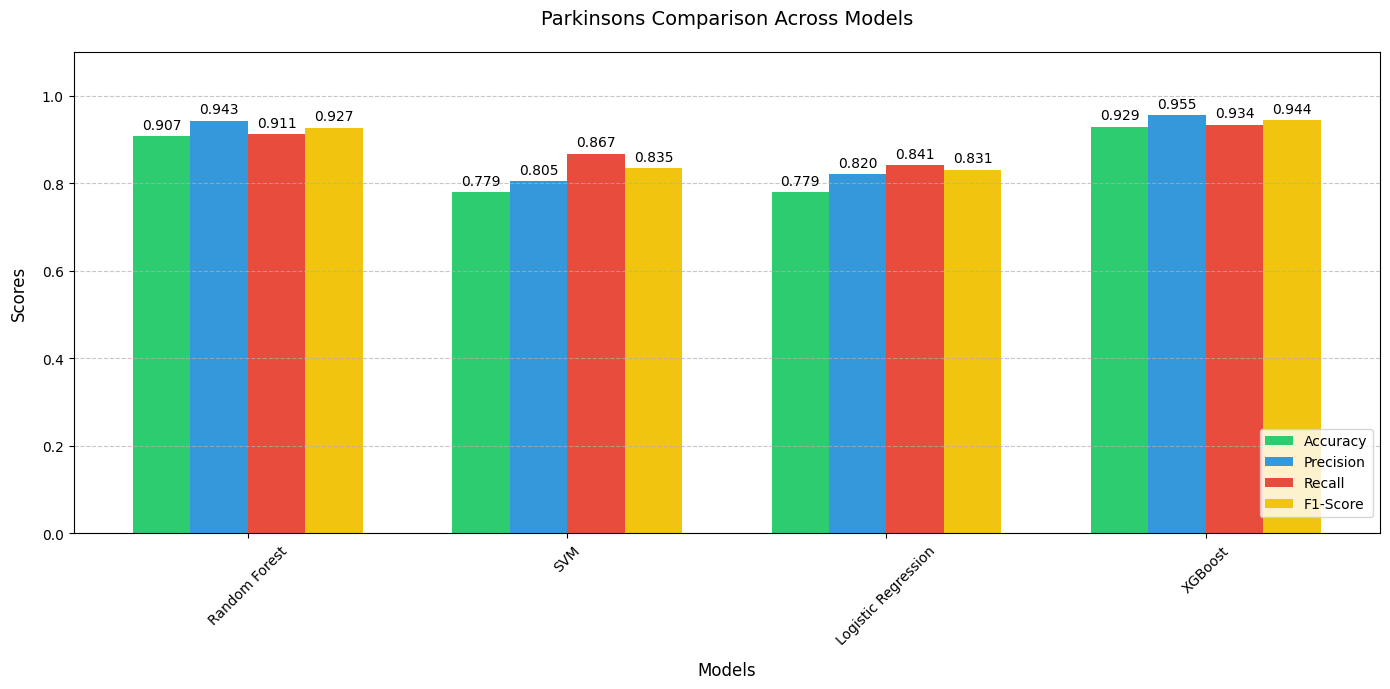

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and metrics
models = ['Random Forest', 'SVM', 'Logistic Regression', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Organize scores by metric
accuracy_scores = [accuracy_score(y_test, rf_pred),
                  accuracy_score(y_test, svm_pred),
                  accuracy_score(y_test, lr_pred),
                  accuracy_score(y_test, y_pred)]

precision_scores = [precision_score(y_test, rf_pred),
                   precision_score(y_test, svm_pred),
                   precision_score(y_test, lr_pred),
                   precision_score(y_test, y_pred)]

recall_scores = [recall_score(y_test, rf_pred),
                recall_score(y_test, svm_pred),
                recall_score(y_test, lr_pred),
                recall_score(y_test, y_pred)]

f1_scores = [f1_score(y_test, rf_pred),
            f1_score(y_test, svm_pred),
            f1_score(y_test, lr_pred),
            f1_score(y_test, y_pred)]

# Set width and positions of bars
barWidth = 0.18  # Reduced width for more spacing
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create bars
plt.figure(figsize=(14, 7))  # Increased figure size
bars1 = plt.bar(r1, accuracy_scores, width=barWidth, label='Accuracy', color='#2ecc71')
bars2 = plt.bar(r2, precision_scores, width=barWidth, label='Precision', color='#3498db')
bars3 = plt.bar(r3, recall_scores, width=barWidth, label='Recall', color='#e74c3c')
bars4 = plt.bar(r4, f1_scores, width=barWidth, label='F1-Score', color='#f1c40f')

# Add value labels
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,  # Added offset
                f'{height:.3f}',
                ha='center', va='bottom', rotation=0)  # Horizontal labels

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

# Customize the plot
plt.xlabel('Models', fontsize=12, labelpad=10)
plt.ylabel('Scores', fontsize=12, labelpad=10)
plt.title('Parkinsons Comparison Across Models', pad=20, fontsize=14)
plt.xticks([r + barWidth*1.5 for r in range(len(models))], models, rotation=45)
plt.ylim(0, 1.1)  # Increased y-limit to accommodate labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.02))

plt.tight_layout()
plt.show()


In [26]:
import pickle


with open('parkinsons_xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(y_pred, model_file)
